In [171]:
import pandas as pd
import numpy as np
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import yeojohnson
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [172]:
#reading the dataset
df=pd.read_csv("boxcox.csv", names=['x'])

In [173]:
#the first 5 rows
df.head()

,x
0,2.93
1,2.41
2,3.72
3,1.51
4,2.63


In [174]:
#statistical summary of the x variable
df.describe() 

,x
count,84.000000
mean,2.999762
std,1.622998
min,0.340000
25%,1.757500
50%,2.780000
75%,3.780000
max,9.990000


In [176]:
#dimension of the x variable
df.shape

(84, 1)

In [177]:
#number of null values
df.isnull().any()

x    False
dtype: bool

In [178]:
#generating other variables based on x values
df['y1']=(df['x'])**(-1)
df['y2']=(df['x'])**(-0.5)
df['y3']=np.log(df['x'])
df['y4']=(df['x'])**(0.5)
df['y5']=df['x']
df['y6']=(df['x'])**(2)

In [179]:
#first 5 rows of the new dataset
df.head()

,x,y1,y2,y3,y4,y5,y6
0,2.93,0.341297,0.584206,1.075002,1.711724,2.93,8.5849
1,2.41,0.414938,0.644157,0.879627,1.552417,2.41,5.8081
2,3.72,0.268817,0.518476,1.313724,1.928730,3.72,13.8384
3,1.51,0.662252,0.813788,0.412110,1.228821,1.51,2.2801
4,2.63,0.380228,0.616626,0.966984,1.621727,2.63,6.9169


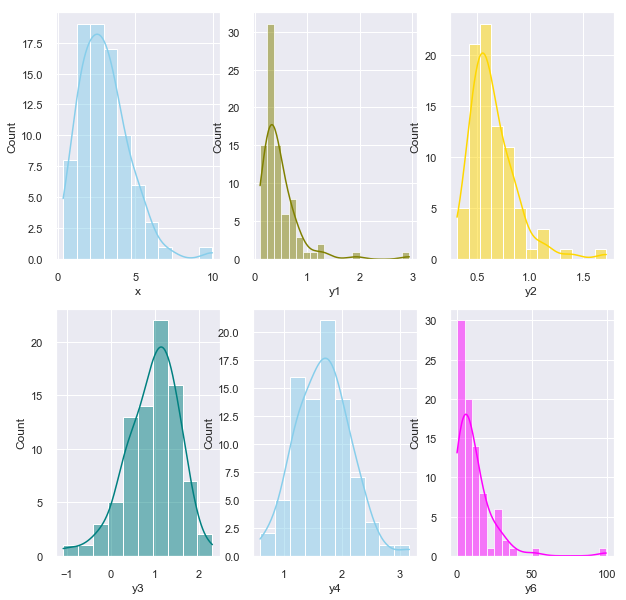

In [180]:
#creating histograms of all variables
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
sns.histplot(data=df, x="x", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=df, x="y1", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=df, x="y2", kde=True, color="gold", ax=axs[0,2 ])
sns.histplot(data=df, x="y3", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="y4", kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=df, x="y6", kde=True, color="magenta", ax=axs[1, 2])

among 6 variables, it seems that "y4" is near to normal

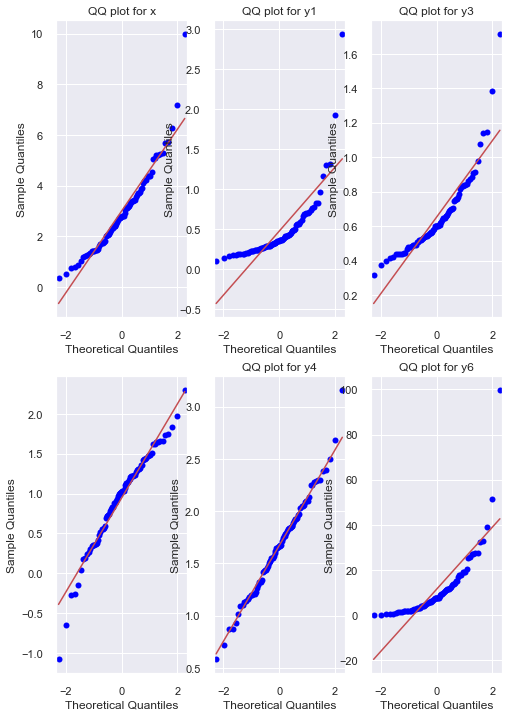

In [181]:
#lets create  Q-Q plots for all variable to check their normality
#we exclude y5, because it is the same as "x" variable
fig, ax = plt.subplots(2, 3, figsize=(8, 12))
sm.qqplot(df['x'], line='s', ax=ax[0,0])
ax[0,0].set_title('QQ plot for x')
sm.qqplot(df['y1'], line='s', ax=ax[0,1])
ax[0,1].set_title('QQ plot for y1')
sm.qqplot(df['y2'], line='s', ax=ax[0,2])
ax[0,2].set_title('QQ plot for y2')
sm.qqplot(df['y3'], line='s', ax=ax[1,0])
ax[0,2].set_title('QQ plot for y3')
sm.qqplot(df['y4'], line='s', ax=ax[1,1])
ax[1,1].set_title('QQ plot for y4')
sm.qqplot(df['y6'], line='s', ax=ax[1,2])
ax[1,2].set_title('QQ plot for y6')
plt.show()

as illustrated, using Q-Q plot, y4 seems to be normal. 

In [102]:
#lets use statistical tests for normality
#Anderson-Darling Test for normality
for j in ['x','y1','y2','y3','y4','y5','y6']:
    print("*"*100)
    print("test results for", j, "\n")
    anderson_results = stats.anderson(df[j], dist='norm')
    for i in range(len(anderson_results.critical_values)):
        sl, cv = anderson_results.significance_level[i], anderson_results_10.critical_values[i]
        if anderson_results.statistic < anderson_results.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

****************************************************************************************************
test results for x 

15.000: 0.552, data does not look normal (reject H0)
10.000: 0.628, data does not look normal (reject H0)
5.000: 0.754, data does not look normal (reject H0)
2.500: 0.879, data does not look normal (reject H0)
1.000: 1.046, data looks normal (fail to reject H0)
****************************************************************************************************
test results for y1 

15.000: 0.552, data does not look normal (reject H0)
10.000: 0.628, data does not look normal (reject H0)
5.000: 0.754, data does not look normal (reject H0)
2.500: 0.879, data does not look normal (reject H0)
1.000: 1.046, data does not look normal (reject H0)
****************************************************************************************************
test results for y2 

15.000: 0.552, data does not look normal (reject H0)
10.000: 0.628, data does not look normal (reject H0)
5.

using Anderson-Darling Test, only y4 looks normal in all confidence intervals

In [104]:
#another statistical test for normality
#Shapiro- wilk Test
for j in ['x','y1','y2','y3','y4','y5','y6']:
    print("*"*100)
    print("test results for", j, "\n")
    stat, p = shapiro(df[j])
    if p<0.05:
        print(j," data does not look normal (reject H0)")
    else:
        print(j, " data looks normal (fail to reject H0)")

****************************************************************************************************
test results for x 

x  data does not look normal (reject H0)
****************************************************************************************************
test results for y1 

y1  data does not look normal (reject H0)
****************************************************************************************************
test results for y2 

y2  data does not look normal (reject H0)
****************************************************************************************************
test results for y3 

y3  data does not look normal (reject H0)
****************************************************************************************************
test results for y4 

y4  data looks normal (fail to reject H0)
****************************************************************************************************
test results for y5 

y5  data does not look normal (reject H0)
************

also, in Shapiro- wilk Test only y4 looks normal. 

In [105]:
#another statistical test for normality
#D’Agostino’s K-squared Test
for j in ['x','y1','y2','y3','y4','y5','y6']:
    print("*"*100)
    print("test results for", j, "\n")
    stat, p = normaltest(df[j])
    if p<0.05:
        print(j," data does not look normal (reject H0)")
    else:
        print(j, " data looks normal (fail to reject H0)")

****************************************************************************************************
test results for x 

x  data does not look normal (reject H0)
****************************************************************************************************
test results for y1 

y1  data does not look normal (reject H0)
****************************************************************************************************
test results for y2 

y2  data does not look normal (reject H0)
****************************************************************************************************
test results for y3 

y3  data does not look normal (reject H0)
****************************************************************************************************
test results for y4 

y4  data looks normal (fail to reject H0)
****************************************************************************************************
test results for y5 

y5  data does not look normal (reject H0)
************

the same for D’Agostino’s K-squared Test

In [184]:
#we want to normalize the variables. one of the techniques for this transformation is named "Box-Cox".
#However, for this transformation, values strictly to be positive.
#checking for negative values
df[df<0].any()

x     False
y1    False
y2    False
y3     True
y4    False
y5    False
y6    False
dtype: bool

As "y3" has negative values, "cox-box" is not applicable for this variable. Instead, we use "Yeo-Johnson Transformation" for this variable. 

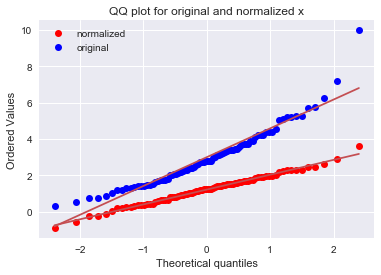

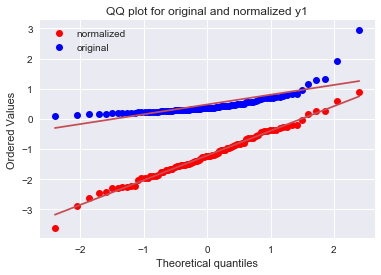

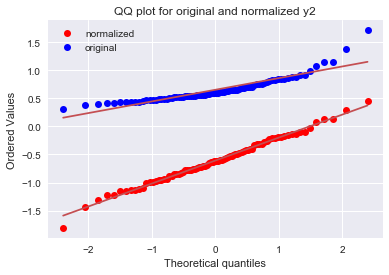

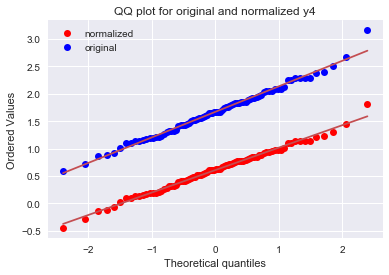

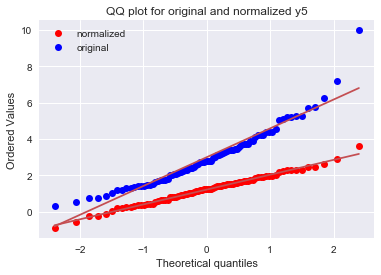

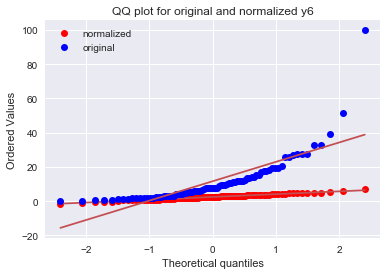

In [185]:
#using box-cox transformation for all variables, except y3
#following, we also plot Q-Q plot for the original and normalized variable
plt.style.use('seaborn')
for j in ['x','y1','y2','y4','y5','y6']:
    fitted_data, fitted_lambda = stats.boxcox(df[j])
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    stats.probplot(fitted_data, dist=stats.norm , plot=plt, fit=False)
    stats.probplot(df[j], dist=stats.norm, plot=plt, fit=False)
    # Change colour of scatter
    ax.get_lines()[0].set_markerfacecolor('red')
    ax.get_lines()[0].set_label('normalized')
    ax.get_lines()[2].set_markerfacecolor('blue')
    ax.get_lines()[2].set_label('original')
    ax.set_title('QQ plot for original and normalized {}'.format(j))
    ax.legend()
    ax.plot()

it seems that the transformation worked well for those variables

In [164]:
#now we use D’Agostino’s K-squared Test for normalized variables,
#to see how "Box-Cox" transformation worked for those variables
plt.style.use('seaborn')
for j in ['x','y1','y2','y4','y5','y6']:
    print("*"*100)
    print("test results for normalized ", j, "\n")
    fitted_data, fitted_lambda = stats.boxcox(df[j])
    stat, p = normaltest(fitted_data)
    if p<0.05:
        print(j," data does not look normal (reject H0)")
    else:
        print(j, " data looks normal (fail to reject H0)")

****************************************************************************************************
test results for normalized  x 

x  data looks normal (fail to reject H0)
****************************************************************************************************
test results for normalized  y1 

y1  data looks normal (fail to reject H0)
****************************************************************************************************
test results for normalized  y2 

y2  data looks normal (fail to reject H0)
****************************************************************************************************
test results for normalized  y4 

y4  data looks normal (fail to reject H0)
****************************************************************************************************
test results for normalized  y5 

y5  data looks normal (fail to reject H0)
****************************************************************************************************
test results for

now, all variables looks normal

[]

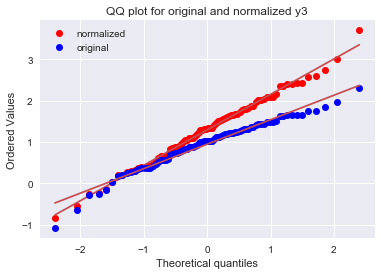

In [168]:
#mentioned above, "box-cox" transformation was not applicable for y3,
#so we use another method named "Yeo-Johnson Transformation"
yf_target, lam = yeojohnson(df["y3"])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
stats.probplot(yf_target, dist=stats.norm , plot=plt, fit=False)
stats.probplot(df['y3'], dist=stats.norm, plot=plt, fit=False)
# Change colour of scatter
ax.get_lines()[0].set_markerfacecolor('red')
ax.get_lines()[0].set_label('normalized')
ax.get_lines()[2].set_markerfacecolor('blue')
ax.get_lines()[2].set_label('original')
ax.set_title('QQ plot for original and normalized y3')
ax.legend()
ax.plot()

In [170]:
#using D’Agostino’s K-squared Test for normalized y3
stat, p = normaltest(yf_target)
p

0.9445835017410198

p-value is greater that 0.05, so we cannot reject the null hypothesis, which is y3 is normally distributed